Question 3:

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Question 4:

In [ ]:
#Change to relative path with ../ 
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows=6868)

In [ ]:
gdp_df.head()

In [ ]:
gdp_df.tail()

Question 5:

In [ ]:
gdp_df = (gdp_df
            .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
            .drop(columns=['Value Footnotes'])
        )   

Question 6:

In [ ]:
print(gdp_df)
gdp_df.dtypes


 gdp_df - ROWS = 6868 , COLS = 3 

Column Data Types : Country = object aka. str , Year = int64 , GDP_Per_Capita = float64

Question 7: 

In [ ]:
year_counts = gdp_df.value_counts(subset='Year')
x = year_counts.index
y = year_counts
plt.scatter(x,y)
plt.title('Observations per Year')
plt.xlabel('Year')
plt.ylabel('# of Observations')

print('Years range from ', x.min(), 'to', x.max())

There is an increase of observations taken per year from 1990 to 2019. There is also a slight decrease in observations in the last year, 2019.  

Question 8:

In [ ]:
num_unique_countries = gdp_df.loc[:,'Country'].nunique()
print('There are',num_unique_countries, 'countries represented in the dataset.')

country_counts = gdp_df.loc[:,'Country'].value_counts()

#Countries that have less than 30 years of data 
underepresented = country_counts[country_counts < 30]
x_1 = underepresented.index
y_1 = underepresented

plt.rcParams["figure.figsize"] = [30, 5]
plt.rcParams["figure.autolayout"] = True

plt.bar(x_1, y_1, width=0.3)
plt.xticks(rotation=45)
plt.title('# of Observations vs. Country')
plt.xlabel('Country Name')
plt.ylabel('# of Years of Data Collection')

print("Countries with less than 30 years of data collected:\n",list(x_1))

I think these countries are in the category of developing countries, which means they have lower economic performance than fully developed countries. This could be a reason for their lack of GDP data collection. 

Question 9:

In [ ]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]

Question 10:

In [ ]:
stats = gdp_2014['GDP_Per_Capita'].describe()
print(stats)

Question 11:

In [ ]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins=30)
plt.title('GDP Per Captia Values for 2014')
plt.xlabel('GDP Per Capita in $')
plt.ylabel('Frequency')
plt.show()

The shape of this ditribution is right skewed. 

Question 12:

In [ ]:
#Top 5 countries 
top_5_values = (gdp_2014['GDP_Per_Capita'].sort_values(ascending=False)).iloc[:5]
top_5_countries_2014 = gdp_df.iloc[top_5_values.index]
print('Top 5 Countries 2014:',top_5_countries_2014)

#Bottom 5 countries
bottom_5_values = (gdp_2014['GDP_Per_Capita'].sort_values(ascending=True)).iloc[:5]
bottom_5_countries_2014 = gdp_df.iloc[bottom_5_values.index]
print('Bottom 5 Countries 2014:',bottom_5_countries_2014)

Question 13:

In [ ]:
gdp_pivoted = ((gdp_df.pivot(index='Country',columns='Year',values='GDP_Per_Capita'))[[1990, 2017]]).dropna()

Question 14:

In [ ]:
gdp_pivoted['Percent Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/(gdp_pivoted[1990])

Question 15:

In [ ]:
#Negative % change in gdp 
negative_per_change_gdp = gdp_pivoted[gdp_pivoted['Percent Change'] < 0]
print('There were', len(negative_per_change_gdp),'countries that experienced a negative percent change in GDP from 1990 to 2017')

Question 16:

In [ ]:
highest_change_in_GDP = gdp_pivoted['Percent Change'].idxmax()
print('The country with the highest percent change in GDP was:',highest_change_in_GDP)

# Line plot with GDP percapita for years 1990-2017
eq_gin_gdp_df = gdp_df[gdp_df['Country'] == highest_change_in_GDP]
x_3 = eq_gin_gdp_df['Year']
y_3 = eq_gin_gdp_df['GDP_Per_Capita']
plt.plot(x_3,y_3)
plt.title('GDP per Capita vs. Year for ' + highest_change_in_GDP)  
plt.xlabel('Year')
plt.ylabel('$')
plt.rcParams["figure.figsize"] = [10, 5]
plt.ylim(0,50000)
plt.show()

In [ ]:
#Order the original dataframe, and knock off the top position and then return the index 
second_highest_change_in_GDP = gdp_pivoted['Percent Change'].sort_values(ascending=False)
second_highest_change_in_GDP = second_highest_change_in_GDP.iloc[1:].idxmax()
print('The country with the second highest percent change in GDP was:',second_highest_change_in_GDP)

# Line plot with GDP percapita for years 1990-2017
china_gdp_df = gdp_df[gdp_df['Country'] == second_highest_change_in_GDP]
x_4 = china_gdp_df['Year']
y_4 = china_gdp_df['GDP_Per_Capita']
plt.plot(x_4,y_4)
plt.title('GDP per Capita vs. Year for ' + second_highest_change_in_GDP)  
plt.xlabel('Year')
plt.ylabel('$')
plt.rcParams["figure.figsize"] = [10, 5]
plt.ylim(0,50000)
plt.show()


The trends for these countries vary drastically. Equitorial Guinea seemed to have a dramatic up and down fluctuation of their GDP per capita from 1990 to 2017, while China kept a shallow but steady increase over time. 

Question 17: 

In [ ]:
continents = pd.read_csv('../data/continents.csv')

Question 18:

In [ ]:
gdp_df = gdp_df.merge(continents)

Question 19:

In [ ]:
print('Ther are a total of', continents['Continent'].nunique(), 'continents in the dataframe.') #Print the number of unique continents in the df

num_countries_per_con = list([sum(continents['Continent'] == 'Asia')
                            , sum(continents['Continent'] == 'Africa')
                            , sum(continents['Continent'] == 'Europe')
                            , sum(continents['Continent'] == 'North America')
                            , sum(continents['Continent'] == 'South America')
                            , sum(continents['Continent'] == 'Oceania')]
                            )

plt.bar(continents['Continent'].unique(),num_countries_per_con)
plt.title('Number of Countries per Continent')


Question 20:

In [ ]:
continents_gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

sns.boxplot(data=continents_gdp_2014, x='GDP_Per_Capita', y='Continent' )
plt.title('Spread of GDP per Capita for each Continent')
plt.show()

Question 21 & 22:

In [ ]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv')
life_expectancy = (life_expectancy
                    .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
                    .melt(id_vars=['Country Name'])
                    .rename(columns={'Country Name':'Country','variable':'Year','value':'Life_Expectancy'})
                )

Question 23:

In [ ]:
#First Country with lE > 80 yrs old, find the earliest year to hit 80
life_expectancy_over_80 = (
                            life_expectancy
                            [life_expectancy['Life_Expectancy'] > 80]
                            .sort_values(['Year'])
                            )
print('The first country with a life expectancy to exceed 80 was', life_expectancy_over_80['Country'].iloc[0],'.')

Question 24:

In [ ]:
#Making anew variable because I dont have one called gdp_per_capita up to this point
gdp_per_capita = pd.read_csv('../data/gdp_per_capita.csv', nrows=6868)
gdp_per_capita = (gdp_per_capita
                    .drop(columns=['Value Footnotes'])
                    .rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})
                )
#Merge the two DF's, must convert year on life expectany to int64 from str
#First Delete Rows with nan
life_expectancy = life_expectancy.dropna()
life_expectancy['Year'] = pd.to_numeric(life_expectancy['Year'])
gdp_le = gdp_per_capita.merge(life_expectancy)

In [ ]:
gdp_le.head()

In [ ]:
gdp_le.tail()

Question 25:

In [ ]:
gdp_le_2019 = gdp_le[(gdp_le['Year'] == 2019)]

print(len(gdp_le_2019[gdp_le_2019['Life_Expectancy'] >= 80]), 'countries had a life expectancy of at least 80 years old in 2019.')            

Question 26:

In [ ]:
top_3_gdp_le_2019 = (gdp_le_2019
                    .sort_values(by=['GDP_Per_Capita'], ascending=False)
                    .iloc[:3]
                    )
top_3_countries = list(top_3_gdp_le_2019['Country'])

In [ ]:
top_3_countries_df = gdp_le[gdp_le['Country'].isin(top_3_countries)] 

graph = sns.FacetGrid(top_3_countries_df, col='Country')
graph.map(plt.plot,'Year','Life_Expectancy')
plt.show()

Question 27:

In [ ]:
plt.scatter(gdp_le_2019['GDP_Per_Capita'],gdp_le_2019['Life_Expectancy'])

plt.title('Life Expectancy vs. GDP Per Capita 2019')
plt.xlabel('GDP Per Capita $')
plt.ylabel('Life Expantancy Years')
plt.show()

I notice a positive correlation between the life expectancy and gdp_per capita of a country. 

Question 28:

In [ ]:
correlation = gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])
print(correlation)

This value means that there is a moderately stron positive correlation bt. the two variables. 

Question 29:

In [ ]:
gdp_le_2019.insert(3, 'Log_GDP_Per_Capita', np.log(gdp_le_2019['GDP_Per_Capita']))
print(gdp_le_2019.head())

In [36]:
correlation_2 = gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['Log_GDP_Per_Capita'])
print(correlation_2)

This correlation is slightly higher than the base GDP percapita values.

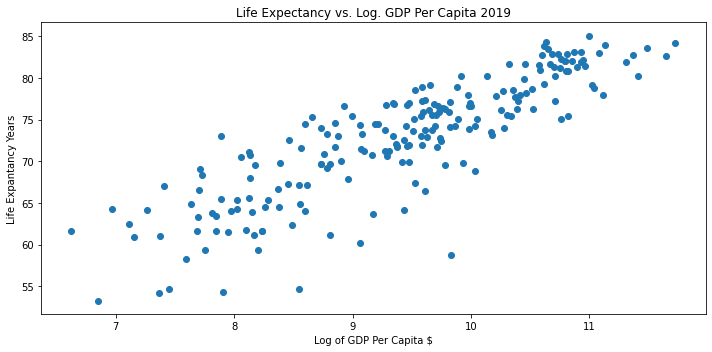

In [37]:
plt.scatter(gdp_le_2019['Log_GDP_Per_Capita'],gdp_le_2019['Life_Expectancy'])

plt.title('Life Expectancy vs. Log. GDP Per Capita 2019')
plt.xlabel('Log of GDP Per Capita $')
plt.ylabel('Life Expantancy Years')
plt.show()